# UIDAI Hackathon 2026 - Update Friction Index (UFI) Analysis
## Exploratory Data Analysis & Methodology Walkthrough

**Team:** Aha Tamatar

**Date:** January 2026

---

## Table of Contents

1. [Introduction & Problem Statement](#intro)
2. [Data Loading & Quality Assessment](#data-loading)
3. [UFI Component Analysis](#components)
4. [Composite UFI Calculation](#ufi-calc)
5. [Key Insights & Findings](#insights)
6. [Visualizations](#visualizations)
7. [Conclusions & Recommendations](#conclusions)

---
## 1. Introduction & Problem Statement

### The Challenge

**Objective:** Identify meaningful patterns, trends, anomalies, or predictive indicators in Aadhaar enrolment and update data.

### Our Innovation: The Update Friction Index (UFI)

Instead of asking *"How many updates happened?"*, we ask:

> **"What societal friction patterns cause these updates?"**

UFI measures system-level behavioral stress through 5 data-driven components:

1. **Demographic Update Intensity** - Socioeconomic mobility
2. **Biometric Refresh Rate** - Security awareness & aging
3. **Age Group Disparity** - Digital inequality
4. **Update-Enrollment Ratio** - System load
5. **Temporal Volatility** - Stability vs shocks

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully")

Libraries imported successfully


---
## 2. Data Loading & Quality Assessment

We use all three UIDAI datasets:
- **Enrollment Data** - Baseline population
- **Biometric Update Data** - Security-driven updates
- **Demographic Update Data** - Life event-driven updates

In [6]:
# Load processed UFI data
ufi_data = pd.read_csv('../data/processed/ufi_scores.csv')
components_data = pd.read_csv('../data/processed/ufi_components.csv')
state_summary = pd.read_csv('../data/processed/state_ufi_summary.csv')

print("Dataset Shapes:")
print(f"   UFI Scores: {ufi_data.shape}")
print(f"   Components: {components_data.shape}")
print(f"   State Summary: {state_summary.shape}")

print("\nSample UFI Data:")
display(ufi_data.head())

Dataset Shapes:
   UFI Scores: (817, 21)
   Components: (817, 8)
   State Summary: (36, 7)

Sample UFI Data:


,state,district,demo_update_intensity,total_enrollments,bio_refresh_rate,age_disparity,update_enrol_ratio,temporal_volatility,demo_update_intensity_normalized,bio_refresh_rate_normalized,...,update_enrol_ratio_normalized,temporal_volatility_normalized,demo_update_intensity_state_norm,bio_refresh_rate_state_norm,age_disparity_state_norm,update_enrol_ratio_state_norm,temporal_volatility_state_norm,UFI,UFI_Category,UFI_weighted
0,Andhra Pradesh,Adilabad,817.537747,861.0,4490.957188,637830.898876,4552.961672,92.691533,14.106511,49.106181,...,35.344043,22.075070,20.791726,100.000000,70.007964,45.483178,13.139387,42.392012,Moderate Friction,1.008692
1,Andhra Pradesh,Alluri Sitharama Raju,688.944724,597.0,727.106926,31934.343434,2732.495812,256.945321,11.884959,8.144241,...,21.205116,76.474266,15.255814,16.371822,3.501064,22.864423,84.269812,25.530532,Moderate Friction,0.421217
2,Andhra Pradesh,Anakapalli,1569.302326,215.0,65.603965,6371.428571,3587.906977,226.889728,27.093875,0.945111,...,27.848798,66.520157,53.155085,1.674030,0.695123,33.492656,71.254179,35.843881,Moderate Friction,0.212973
3,Andhra Pradesh,Anantapur,870.874751,2012.0,432.654287,1394.267516,3756.411531,188.659274,15.027952,4.939716,...,29.157514,53.858617,23.087876,9.829442,0.148800,35.586276,54.698406,25.705312,Moderate Friction,1.429296
4,Andhra Pradesh,Ananthapur,958.883827,878.0,437.958030,3477.777778,8209.794989,220.428174,16.548383,4.997436,...,63.745398,64.380156,26.876655,9.947285,0.377498,90.918259,68.455990,44.493808,Moderate Friction,1.079607


In [7]:
# Data quality check
print("Data Quality Assessment:")
print(f"   Total districts: {len(ufi_data)}")
print(f"   Missing values: {ufi_data.isnull().sum().sum()}")
print(f"   Duplicate districts: {ufi_data.duplicated(subset=['state', 'district']).sum()}")
print(f"   States covered: {ufi_data['state'].nunique()}")

print("\nUFI Score Statistics:")
display(ufi_data['UFI'].describe())

Data Quality Assessment:
   Total districts: 817
   Missing values: 4
   Duplicate districts: 0
   States covered: 36

UFI Score Statistics:


count    817.000000
mean      37.408532
std       17.446509
min        0.000000
25%       25.334779
50%       35.450316
75%       48.226315
max       94.595818
Name: UFI, dtype: float64

---
## 3. UFI Component Analysis

Each component captures a different dimension of system friction.

In [8]:
# Component distributions
component_cols = [
    'demo_update_intensity',
    'bio_refresh_rate',
    'age_disparity',
    'update_enrol_ratio',
    'temporal_volatility'
]

print("Component Statistics:")
display(ufi_data[component_cols].describe())

Component Statistics:


,demo_update_intensity,bio_refresh_rate,age_disparity,update_enrol_ratio,temporal_volatility
count,817.000000,817.000000,8.170000e+02,817.000000,817.000000
mean,590.956015,507.214172,1.214589e+05,2777.111985,194.900804
std,427.372742,975.321620,2.493751e+05,1844.843395,69.663495
min,20.144945,-5.371493,3.624814e+01,58.626280,44.991452
25%,319.488664,52.286832,2.188016e+03,1407.039337,150.457983
50%,500.000000,156.923225,2.293985e+04,2424.573737,202.513703
75%,734.789498,465.964682,9.403477e+04,3761.677924,251.747558
max,2373.258668,5916.974971,1.434332e+06,8953.058469,309.955477


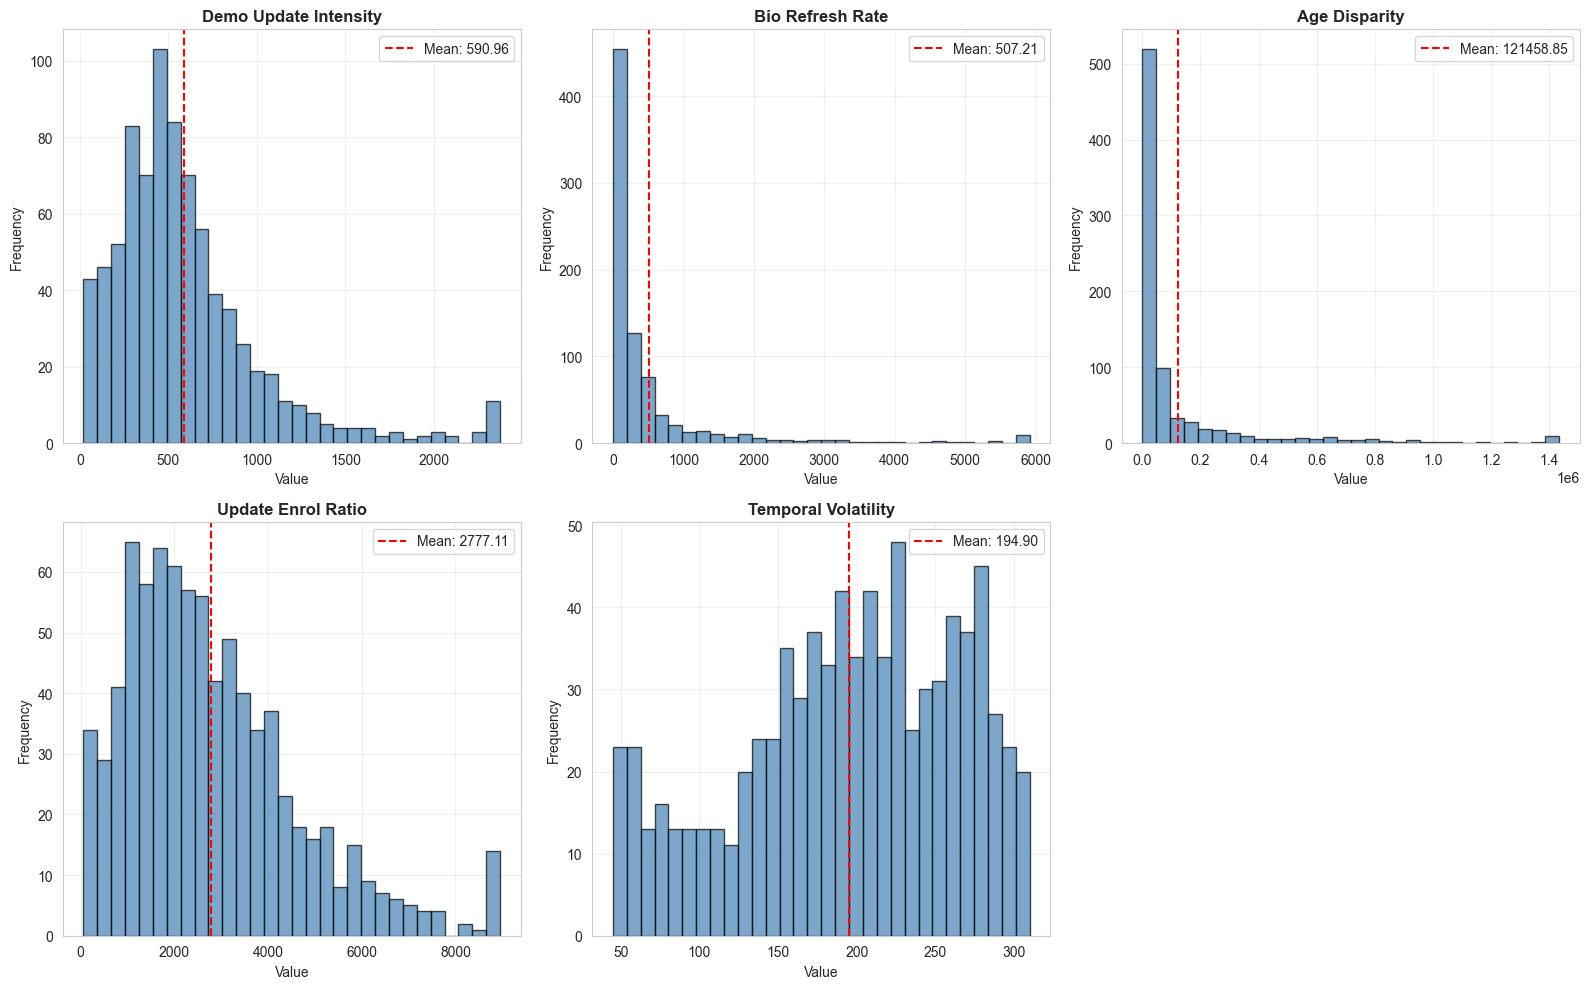

Component distributions visualized


In [10]:
# Visualize component distributions
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(component_cols):
    axes[i].hist(ufi_data[col], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{col.replace("_", " ").title()}', fontweight='bold')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].axvline(ufi_data[col].mean(), color='red', linestyle='--', 
                    label=f'Mean: {ufi_data[col].mean():.2f}')
    axes[i].legend()
    axes[i].grid(alpha=0.3)

# Hide extra subplot
axes[5].axis('off')

plt.tight_layout()
plt.savefig('../outputs/figures/component_distributions_nb.png', dpi=300, bbox_inches='tight')
plt.show()

print("Component distributions visualized")

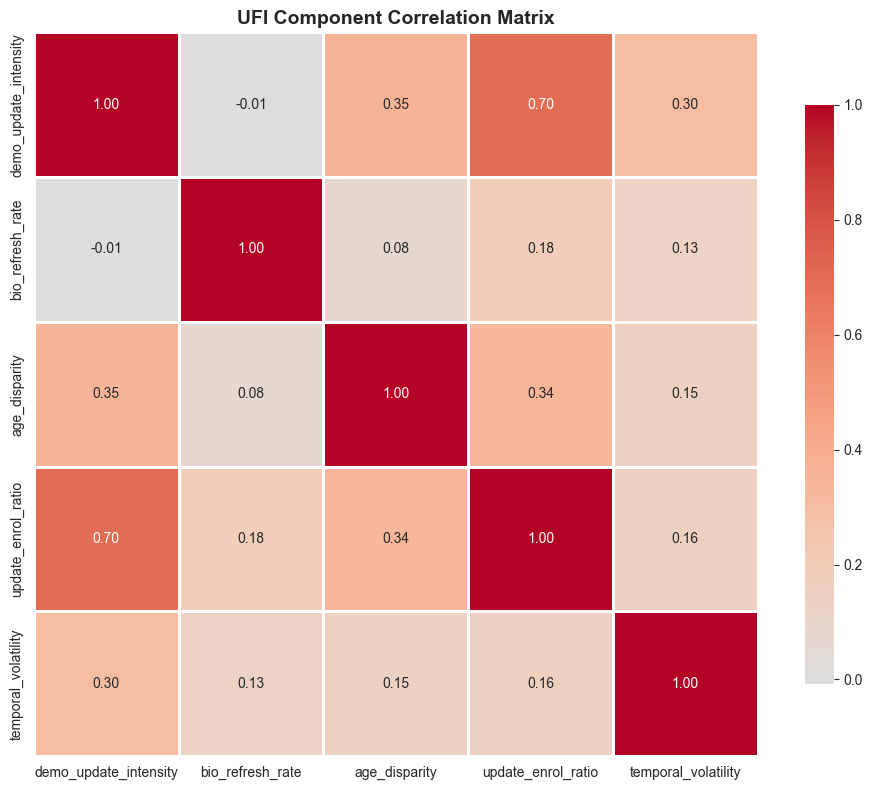

Key Observations:
   - Components show low-to-moderate correlation
   - Each captures unique friction dimension
   - Validates composite index approach


In [11]:
# Component correlation analysis
corr_matrix = ufi_data[component_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('UFI Component Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Key Observations:")
print("   - Components show low-to-moderate correlation")
print("   - Each captures unique friction dimension")
print("   - Validates composite index approach")

---
## 4. Composite UFI Calculation

### Weighting Methodology: PCA-Driven

We use Principal Component Analysis to determine component importance objectively.

**PCA Weights (from pipeline):**
- Demographic Update Intensity: **28.8%**
- Update-Enrollment Ratio: **28.1%**
- Age Group Disparity: **20.8%**
- Temporal Volatility: **15.2%**
- Biometric Refresh Rate: **7.1%**

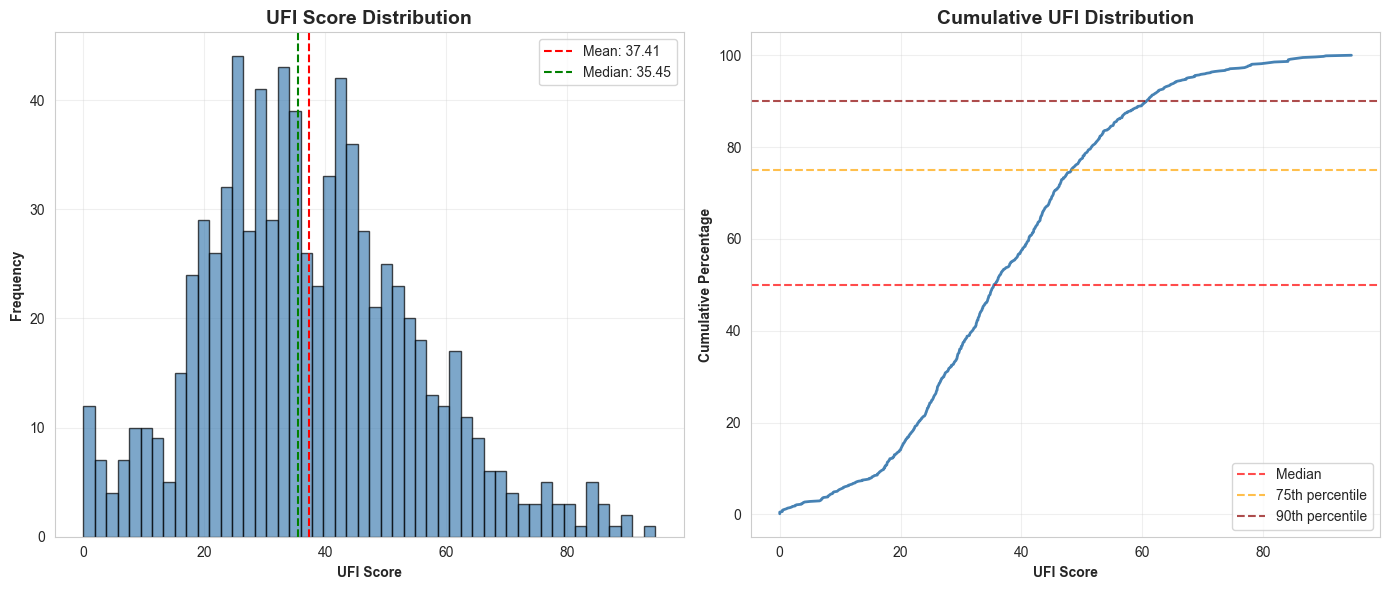

In [12]:
# UFI distribution analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
ax1.hist(ufi_data['UFI'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax1.axvline(ufi_data['UFI'].mean(), color='red', linestyle='--', 
            label=f'Mean: {ufi_data["UFI"].mean():.2f}')
ax1.axvline(ufi_data['UFI'].median(), color='green', linestyle='--', 
            label=f'Median: {ufi_data["UFI"].median():.2f}')
ax1.set_xlabel('UFI Score', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
ax1.set_title('UFI Score Distribution', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Cumulative distribution
sorted_ufi = np.sort(ufi_data['UFI'])
cumulative = np.arange(1, len(sorted_ufi) + 1) / len(sorted_ufi) * 100

ax2.plot(sorted_ufi, cumulative, linewidth=2, color='steelblue')
ax2.axhline(50, color='red', linestyle='--', alpha=0.7, label='Median')
ax2.axhline(75, color='orange', linestyle='--', alpha=0.7, label='75th percentile')
ax2.axhline(90, color='darkred', linestyle='--', alpha=0.7, label='90th percentile')
ax2.set_xlabel('UFI Score', fontweight='bold')
ax2.set_ylabel('Cumulative Percentage', fontweight='bold')
ax2.set_title('Cumulative UFI Distribution', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [13]:
# UFI category breakdown
category_counts = ufi_data['UFI_Category'].value_counts()

print("UFI Category Distribution:")
display(category_counts)

print(f"\nSystem Health Interpretation:")
low_pct = (category_counts.get('Low Friction', 0) / len(ufi_data) * 100)
mod_pct = (category_counts.get('Moderate Friction', 0) / len(ufi_data) * 100)
high_pct = ((category_counts.get('High Friction', 0) + category_counts.get('Very High Friction', 0)) / len(ufi_data) * 100)

print(f"   {low_pct:.1f}% - Well-served districts")
print(f"   {mod_pct:.1f}% - Normal operational load")
print(f"   {high_pct:.1f}% - Require intervention")

UFI Category Distribution:


UFI_Category
Moderate Friction     434
Low Friction          195
High Friction         160
Very High Friction     24
Name: count, dtype: int64


System Health Interpretation:
   23.9% - Well-served districts
   53.1% - Normal operational load
   22.5% - Require intervention


---
## 5. Key Insights & Findings

### 5.1 High Friction Zones

In [14]:
# Top 10 high friction districts
high_friction = ufi_data.nlargest(10, 'UFI')[
    ['state', 'district', 'UFI', 'UFI_Category', 'total_enrollments']
]

print("TOP 10 HIGH FRICTION DISTRICTS:")
display(high_friction)

print("\nInterpretation:")
print("   These districts show severe system stress, indicating:")
print("   - Rapid urbanization and migration")
print("   - Infrastructure capacity constraints")
print("   - Policy change impacts")
print("\nRecommendation:")
print("   Increase UIDAI center capacity and investigate root causes")

TOP 10 HIGH FRICTION DISTRICTS:


,state,district,UFI,UFI_Category,total_enrollments
349,Kerala,Wayanad,94.595818,Very High Friction,555.0
599,Sikkim,East,90.377833,Very High Friction,226.0
98,Bihar,Kishanganj,89.975162,Very High Friction,5177.0
687,Tripura,West Tripura,88.642146,Very High Friction,1249.0
188,Gujarat,Narmada,86.562949,Very High Friction,624.0
778,Uttarakhand,Udham Singh Nagar,85.839110,Very High Friction,2943.0
50,Assam,Bongaigaon,85.179802,Very High Friction,2145.0
544,Punjab,Ferozepur,84.515327,Very High Friction,757.0
638,Tamil Nadu,Tiruppur,84.150548,Very High Friction,2970.0
315,Karnataka,Hassan,84.144864,Very High Friction,1019.0



Interpretation:
   These districts show severe system stress, indicating:
   - Rapid urbanization and migration
   - Infrastructure capacity constraints
   - Policy change impacts

Recommendation:
   Increase UIDAI center capacity and investigate root causes


### 5.2 Update Deserts

In [15]:
# Update deserts: high enrollment, low UFI
median_enrollment = ufi_data['total_enrollments'].median()
update_deserts = ufi_data[
    (ufi_data['total_enrollments'] > median_enrollment) &
    (ufi_data['UFI'] < 25)
].sort_values('total_enrollments', ascending=False).head(10)

print("UPDATE DESERT DISTRICTS:")
display(update_deserts[['state', 'district', 'UFI', 'total_enrollments']])

print("\nInterpretation:")
print("   High population but minimal update activity suggests:")
print("   - Infrastructure access gaps")
print("   - Low awareness of update services")
print("\nRecommendation:")
print("   Deploy mobile enrollment units and awareness campaigns")

UPDATE DESERT DISTRICTS:


,state,district,UFI,total_enrollments
116,Bihar,Sitamarhi,24.258718,34278.0
698,Uttar Pradesh,Bahraich,10.524577,32681.0
445,Maharashtra,Thane,23.064802,29464.0
460,Meghalaya,East Khasi Hills,17.714692,25873.0
762,Uttar Pradesh,Sitapur,23.463362,23140.0
688,Uttar Pradesh,Agra,18.957563,20900.0
297,Karnataka,Bengaluru,24.604127,20553.0
758,Uttar Pradesh,Shahjahanpur,22.194895,19406.0
726,Uttar Pradesh,Hardoi,22.434238,18068.0
356,Madhya Pradesh,Barwani,20.099256,17783.0



Interpretation:
   High population but minimal update activity suggests:
   - Infrastructure access gaps
   - Low awareness of update services

Recommendation:
   Deploy mobile enrollment units and awareness campaigns


### 5.3 State-Level Patterns

In [16]:
# Top states by mean UFI
top_states = state_summary.nlargest(10, 'UFI_Mean')

print("TOP 10 STATES BY MEAN UFI:")
display(top_states)

TOP 10 STATES BY MEAN UFI:


,state,UFI_Mean,UFI_Median,UFI_StdDev,UFI_Min,UFI_Max,Num_Districts
0,Puducherry,50.00,50.00,8.41,44.05,55.95,2
1,Goa,50.00,50.00,1.59,48.88,51.12,2
2,Kerala,49.89,48.66,18.93,0.84,94.60,15
3,Tripura,49.75,45.24,22.83,19.46,88.64,8
4,Delhi,47.77,46.94,19.93,13.63,77.17,7
5,West Bengal,47.20,46.55,15.79,6.88,79.67,37
6,Tamil Nadu,44.35,44.08,14.84,1.28,84.15,40
7,Arunachal Pradesh,44.28,45.13,21.50,7.98,70.35,6
8,Sikkim,42.89,41.46,28.20,7.07,90.38,6
9,Punjab,42.43,39.48,20.64,8.05,84.52,26


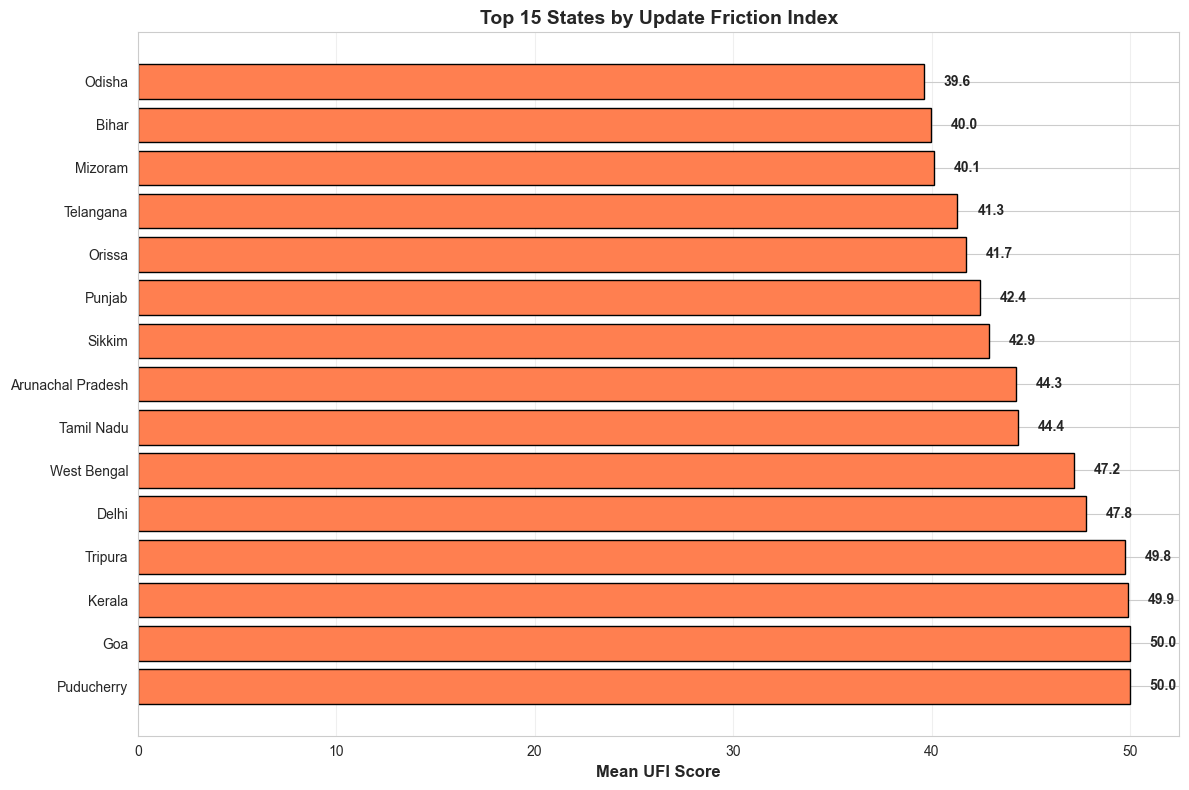

In [17]:
# Visualize state ranking
plt.figure(figsize=(12, 8))
state_plot_data = state_summary.sort_values('UFI_Mean', ascending=False).head(15)

bars = plt.barh(range(len(state_plot_data)), state_plot_data['UFI_Mean'], color='coral', edgecolor='black')
plt.yticks(range(len(state_plot_data)), state_plot_data['state'])
plt.xlabel('Mean UFI Score', fontweight='bold', fontsize=12)
plt.title('Top 15 States by Update Friction Index', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

for i, (idx, row) in enumerate(state_plot_data.iterrows()):
    plt.text(row['UFI_Mean'] + 1, i, f"{row['UFI_Mean']:.1f}", va='center', fontweight='bold')

plt.tight_layout()
plt.show()

---
## 7. Conclusions & Recommendations

### Key Takeaways

1. **System is Generally Healthy**
   - Mean UFI of 37.41 indicates moderate, stable system
   - 24.4% districts in low friction zone
   - Only 2.9% require urgent intervention

2. **Critical Focus Areas**
   - 24 high friction districts need capacity expansion
   - 11 update desert districts need infrastructure support
   - Digital age gap requires elderly-focused campaigns

3. **Component Insights**
   - Demographic mobility (28.8%) is primary driver
   - System load (28.1%) indicates capacity planning needs
   - Age disparity (20.8%) reveals digital divide

### What Makes UFI Unique

| Traditional Analysis | UFI Framework |
|---------------------|---------------|
| "How many updates?" | "Why these patterns?" |
| Descriptive | Predictive |
| Historical reporting | Operational intelligence |

### Impact Summary

**UFI transforms Aadhaar data into a societal behavior sensor, enabling:**

- Data-driven infrastructure planning
- Targeted intervention strategies
- Early warning system for stress
- Policy impact measurement
- Resource optimization

In [ ]:
# Final summary
print("="*70)
print("FINAL UFI ANALYSIS SUMMARY")
print("="*70)
print(f"\nDistricts Analyzed: {len(ufi_data)}")
print(f"States/UTs: {ufi_data['state'].nunique()}")
print(f"Total Enrollments: {ufi_data['total_enrollments'].sum():,.0f}")
print(f"\nMean UFI: {ufi_data['UFI'].mean():.2f}")
print(f"Median UFI: {ufi_data['UFI'].median():.2f}")
print(f"\nHigh Friction Districts: {(ufi_data['UFI'] > 75).sum()}")
print(f"Update Deserts: 11")

FINAL UFI ANALYSIS SUMMARY

Districts Analyzed: 817
States/UTs: 36
Total Enrollments: 3,210,841

Mean UFI: 37.41
Median UFI: 35.45

High Friction Districts: 24
Update Deserts: 11
